
Why Hidden Markov Models?
===============

Often in biololgy we have complex systems, such as inside an organism or an ecosystem, where we have substantial knowledge but not enough to fullly describe or accurately measure the changes within.
We therefore want to reduce the system down to easily packaged states that encapsulate our percieved understanding of the underlying biololgy that can be inferred from easily capturable data sources.

This is where Hidden Markov Models (HMMs) can come in useful. Briefly a HMM is a mathmatical framework that describes a two tiered system, with an observable system (the one we measure) whose changes over time can be inferred to 
represent the changes in a hidden system, one that is often more complex than the observable. We'll go into a bit more depth later about the underling principles later, but a key aspect is knowing when best to apply a HMM, 

Below is a simple checklist you can run through when considering a HMM for your system:

        1. Is your observable data sequential, i.e. a time series dataset or a linear structure such as protein sequences

        2. Can the underlying system (hidden states) be reasonably represented as distinct, descrete states

        3. Is it reasonable to think these hidden states are associated with our observable data

        4. Can I interpret and test the outputs to validate the model

 5. Can the system be modelled under the Markovian assumption (don't worry we'll get to that, but it's very simple) - NOT SURE


We'll use this as a point to introduce the system we'll be modelling throughout this tutorial, sleep in *Drosophila Melanogaster*. LEts go through some background to the topic to help us answer the checklist above. Sleep has been studied in fruit flies since 2000 after sleep-like states were observed when immobile, causing a boom in studies looking to utilise all the genetic tools in fruit flies to gain a better understanding to the general theory of sleep. The flies can be housed in tubes with their activity measured for many days with external inputs to change their environment. For a long time sleep in flies was mostly considered a uniform, monostate event, something at odd with our knowledge of mammalian sleep which has several phases. However, the gold standard for determing sleep states EEGs cannot be used with fruit flies sure to the small size of their brains. But with wew studies using alternative methods researched have shown changes in the whole brain activity throughout sleep bouts that would indicate changing sleep states. The methods are very invasive and difficult to setup, leading to the question, can we predict these internal changes from more easuly accesible data.

THe data we'll be working with is movement data tracked by an ethoscope, a device that can track ~20 flies at once through machine vision. You can read more about them in this [publication](https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.2003026).

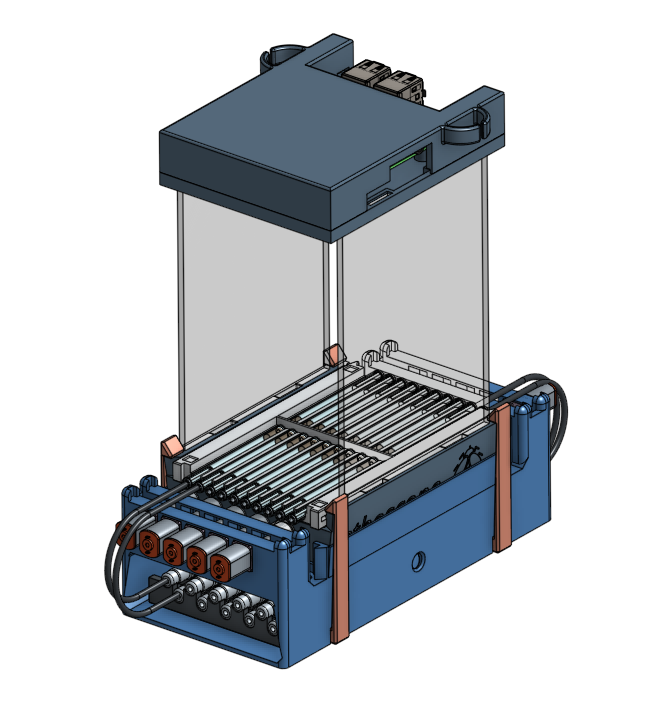
![Screenshot from 2024-01-18 16-28-23.png](<attachment:Screenshot from 2024-01-18 16-28-23.png>)
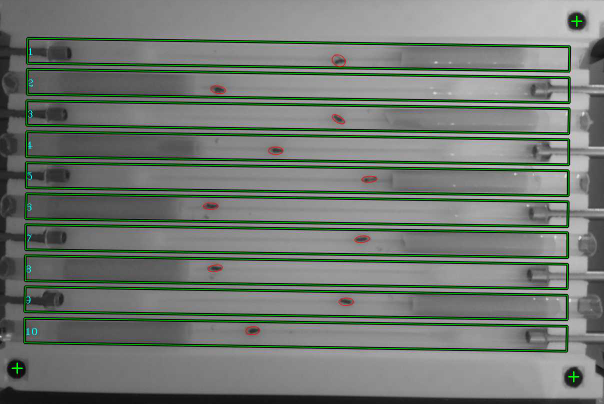

We'll apply this to the checklist:

        1. Is your observable data sequential, i.e. a time series dataset or a linear structure such as protein sequences
**Yes - the data is a time series tracking each individual fly across the day**

        2. Can the underlying system (hidden states) be reasonably represented as distinct, descrete states
**Yes - Our understanding of mammalian (and birds and reptiles) is of distinct sleep states, so we can apply that to flies**

        3. Is it reasonable to think these hidden states are associated with our observable data
**Quite likely - most animals are immobile when sleeping with pre-sleep rituals that are driven by an internal change**

        4. Can I interpret and test the outputs to validate the model
**Yes - Sleep is often measured by the change in arousability, so we can test the predicted states against this**

Now its passed all the checks, lets have a deeper look at markov models to understand how to use them.

What are Hidden Markov Models
=====

HMMs are probabilistic models that work as a sequence of labelling problems, where the labelling problem is the how a chain of observable events are determined by an internal factors that can't be directly observed.

Both parts of a HMM are assumed to be a [stochastic processes](https://en.wikipedia.org/wiki/Stochastic_process), by which they are series of events that have an underlying randomness within a probabilstic space. Simply the data will have elements of randomness but within a known confine of outputs. For example daily temperature can be predicted and modelled but underlying randomness in global weather will never make the recorded data fit 1-too-1 with a model.

The hidden process is a markov chain, the basis for HMMs. A Markov chain follows the assumption that probability of the next state in the sequence is only determined by the one you're in currently, so it's a memory-less system, none of the previous history matters where it going to next, with a fixed matrix of probabilities that will infer what the next state will come. For those of you who like mathmatical equations see below for the markov chain rule:

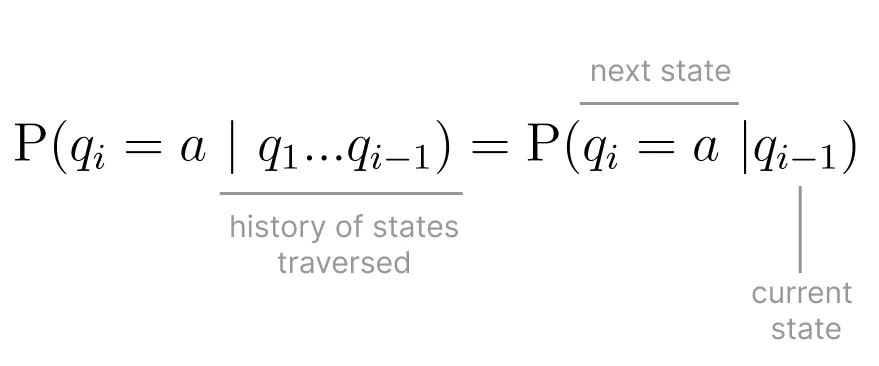

Likewise for the observable process it is assumed that each observed state (emission in the literature) is only dependant on the state that produced it, independant of any of the previous states prior, with each hidden state having a probability matrix that represents the liklihood it will emit any given state

To sum up the parts you have:

        1. The observable process
                a. A sequence of observable states
                b. A probability emission matrix
        
        2. The hidden process
                a. A state architecture desgined by you
                b. A probability transition matrix (what you train)
        
We'll take these parts and generate representations for our example.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import multinomial

In [ ]:
start = 0
x = []
n = 10000
for i in range(n):
    step = np.random.choice([-1,1],p=[0.45,0.55])
    start = start + step
    x.append(start)

In [ ]:
plt.plot(x)
# plt.xlabel('Steps',fontsize=20)
# plt.ylabel(r'$S_{n}$',fontsize=20)

In [ ]:
def markov_sequence(p_init, p_transition, sequence_length):
    """
    Generate a Markov sequence based on p_init and p_transition.
    """
    if p_init is None:
        p_init = equilibrium_distribution(p_transition)
    initial_state = list(multinomial.rvs(1, p_init)).index(1)

    states = [initial_state]
    for _ in range(sequence_length - 1):
        p_tr = p_transition[states[-1]]
        new_state = list(multinomial.rvs(1, p_tr)).index(1)
        states.append(new_state)
    return states

In [ ]:
p_init = np.array([0.1, 0.5, 0.4])
p_transition = np.array([0.3, 0.4, 0.3])

In [ ]:
states = markov_sequence(p_init, p_transition, sequence_length=1000)
fig, ax = plt.subplots(figsize=(12, 4))
plt.plot(states)
plt.xlabel("time step")
plt.ylabel("state")
plt.yticks([0, 1, 2])
sns.despine()

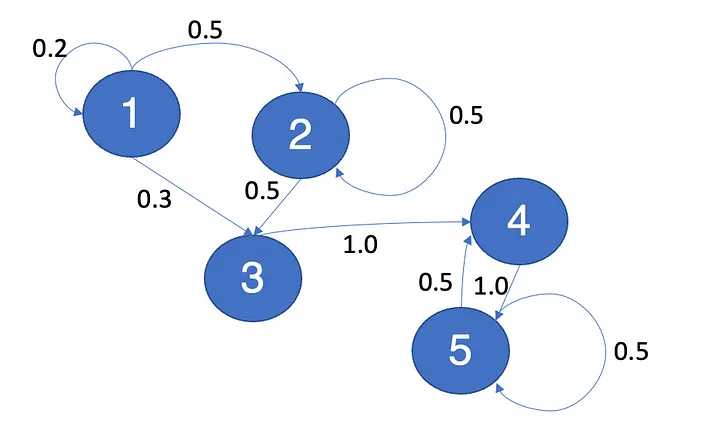